NISHS NOTEBOOK

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [87]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns# importing 

In [2]:
movie_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')

In [3]:
movie_df #tyler cleaned this data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
rt_movie_df =pd.read_csv('../zippedData/rt.movie_info.tsv.gz',delimiter = '\t')

In [5]:
rt_reviews_df = pd.read_csv('../zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding="latin-1")

In [6]:
tmdb_movie_df =pd.read_csv('../zippedData/tmdb.movies.csv.gz')

In [7]:
tn_movie_df =pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

In [8]:
rt_reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


First lets tackle the tn_movies_dataframe. Lets check for any null values

In [9]:
tn_movie_df.isna().sum() 

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

This dataset has no null values throughout the data, the next step is to see the data types we have in the dataset

In [10]:
tn_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [11]:
tn_movie_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
tn_movie_df['production_budget'] = tn_movie_df['production_budget'].str.replace('$','')

In [13]:
tn_movie_df['production_budget'] = tn_movie_df['production_budget'].str.replace(',','')

In [14]:
tn_movie_df['production_budget'] = tn_movie_df['production_budget'].astype(int)

In [15]:
tn_movie_df['domestic_gross']=tn_movie_df['domestic_gross'].str.replace('$','')

In [16]:
tn_movie_df['domestic_gross']=tn_movie_df['domestic_gross'].str.replace(',','')

In [17]:
tn_movie_df['domestic_gross']=tn_movie_df['domestic_gross'].astype(int)

In [18]:
tn_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   object
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


In [19]:
tn_movie_df['worldwide_gross']=tn_movie_df['worldwide_gross'].str.replace('$','')

In [20]:
tn_movie_df['worldwide_gross']=tn_movie_df['worldwide_gross'].str.replace(',','')

In [21]:
tn_movie_df['worldwide_gross'].astype(int)

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [22]:
tn_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   object
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


In [23]:
tn_movie_df.describe()

,id,production_budget,domestic_gross
count,5782.000000,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07
std,28.821076,4.181208e+07,6.824060e+07
min,1.000000,1.100000e+03,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06
50%,50.000000,1.700000e+07,1.722594e+07
75%,75.000000,4.000000e+07,5.234866e+07
max,100.000000,4.250000e+08,9.366622e+08


what can i say about this data ? hmmmmmm movies be expensive 

In [24]:
#lets make a profit column
tn_movie_df['domestic_profit'] = tn_movie_df['domestic_gross'] - tn_movie_df['production_budget']

In [25]:
tn_movie_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382


In [26]:
tn_movie_df['worldwide_gross'] = tn_movie_df['worldwide_gross'].astype(int)

In [27]:
tn_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
 6   domestic_profit    5782 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 316.3+ KB


In [28]:
tn_movie_df['total_gross'] = tn_movie_df['worldwide_gross']+tn_movie_df['domestic_gross']

In [29]:
tn_movie_df['total_profit']= tn_movie_df['total_gross']-tn_movie_df['production_budget']

In [60]:
tn_movie_df['Return_on_investment'] = (tn_movie_df['total_profit']/tn_movie_df['production_budget'])*100

In [61]:
tn_movie_df.sort_values('total_gross', ascending=False )

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,domestic_profit,total_gross,total_profit,Return_on_investment
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,3536852904,3111852904,732.200683
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,2989973445,2683973445,877.115505
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,459363944,2867572339,2667572339,1333.786170
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,2726949682,2426949682,808.983227
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,2301125489,2086125489,970.290925
...,...,...,...,...,...,...,...,...,...,...
4192,93,"Mar 15, 2011",A Shine of Rainbows,6000000,0,0,-6000000,0,-6000000,-100.000000
4193,94,"Dec 31, 2011",Freaky Deaky,6000000,0,0,-6000000,0,-6000000,-100.000000
4194,95,"May 10, 2011",The Hit List,6000000,0,0,-6000000,0,-6000000,-100.000000
4856,57,"Nov 14, 2014",Always Woodstock,2400000,0,0,-2400000,0,-2400000,-100.000000


In [31]:
tn_movie_df['total_profit'].describe()

count    5.782000e+03
mean     1.017730e+08
std      2.108880e+08
min     -1.574753e+08
25%     -3.098222e+05
50%      2.499538e+07
75%      1.111648e+08
max      3.111853e+09
Name: total_profit, dtype: float64

In [32]:
tn_movie_df['domestic_profit'].describe()

count    5.782000e+03
mean     1.028557e+07
std      4.992137e+07
min     -3.072376e+08
25%     -9.132757e+06
50%     -3.487755e+05
75%      1.778144e+07
max      6.306622e+08
Name: domestic_profit, dtype: float64

In [62]:
tn_movie_df['Return_on_investment'].describe()

count      5782.000000
mean        678.370158
std        5492.209049
min        -100.000000
25%         -20.287843
50%         165.931482
75%         489.317031
max      359900.000000
Name: Return_on_investment, dtype: float64

In [33]:
top_10_movies_df = tn_movie_df.sort_values('total_gross', ascending=False ).head()

In [34]:
top_10_movies_df['total_profit'].describe()

count    5.000000e+00
mean     2.595295e+09
std      3.766675e+08
min      2.086125e+09
25%      2.426950e+09
50%      2.667572e+09
75%      2.683973e+09
max      3.111853e+09
Name: total_profit, dtype: float64

In [35]:
bottom_10_movies = tn_movie_df.sort_values('total_gross', ascending=False ).tail()

In [36]:
bottom_10_movies.describe()

,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,total_gross,total_profit
count,5.000000,5.000000e+00,5.0,5.0,5.000000e+00,5.0,5.000000e+00
mean,71.400000,4.200000e+06,0.0,0.0,-4.200000e+06,0.0,-4.200000e+06
std,33.886576,2.545584e+06,0.0,0.0,2.545584e+06,0.0,2.545584e+06
min,18.000000,6.000000e+05,0.0,0.0,-6.000000e+06,0.0,-6.000000e+06
25%,57.000000,2.400000e+06,0.0,0.0,-6.000000e+06,0.0,-6.000000e+06
50%,93.000000,6.000000e+06,0.0,0.0,-6.000000e+06,0.0,-6.000000e+06
75%,94.000000,6.000000e+06,0.0,0.0,-2.400000e+06,0.0,-2.400000e+06
max,95.000000,6.000000e+06,0.0,0.0,-6.000000e+05,0.0,-6.000000e+05


Text(0.5, 1.0, 'Budget vs Worldwide Gross')

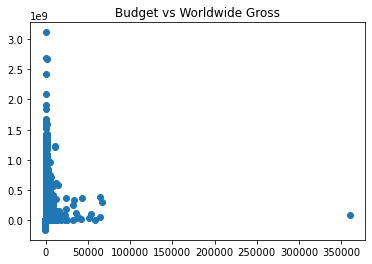

In [66]:
fig, ax = plt.subplots()
ax.scatter(tn_movie_df['Return_on_investment'],tn_movie_df['total_profit'])
plt.title('ROI vs Worldwide Gross')

Text(0.5, 1.0, 'Total gross by movie for top 10 movies')

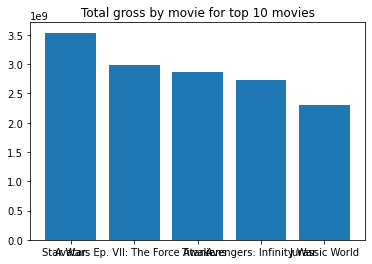

In [59]:
fig, ax = plt.subplots()
ax.bar(x = top_10_movies_df['movie'],height = top_10_movies_df['total_gross'])
plt.title('Total gross by movie for top 10 movies')

In [37]:
rt_reviews_df['rating'].dropna()

0          3/5
6            C
7          2/5
11          B-
12         2/4
         ...  
54424    1.5/5
54428      1/5
54429      2/5
54430    2.5/5
54431      3/5
Name: rating, Length: 40915, dtype: object

In [38]:
rt_reviews_df.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

too many null values to include in our analysis 

In [39]:
rt_movie_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [40]:
rt_movie_df.dropna()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment


In [41]:
rt_movie_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [42]:
tmdb_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [43]:
tmdb_movie_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [44]:
tmdb_movie_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


i think tmdb data is worth keeping beacause of the popularity metrics (popularity, vote)avg, vote_count). To compare the 

In [45]:
tn_movie_df.rename(columns={'movie':'original_title'},inplace=True)

In [46]:
tn_movie_df.duplicated().sum()

0

In [47]:
tmdb_movie_df.duplicated().sum()

0

In [48]:
tmdb_movie_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [49]:
tn_movie_df.head()

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,domestic_profit,total_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,1936903129,1619903129


In [73]:
tn_movie_df.shape

(5782, 10)

In [74]:
tmdb_movie_df.shape

(26517, 10)

In [76]:
tn_movie_df.columns

Index(['id', 'release_date', 'original_title', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'domestic_profit', 'total_gross',
       'total_profit', 'Return_on_investment'],
      dtype='object')

In [77]:
tmdb_movie_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [78]:
tmdb_movie_df[tmdb_movie_df["original_title"]!= tmdb_movie_df["title"]]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14,14,"[27, 80]",41439,en,Saw 3D,20.370,2010-10-28,Saw: The Final Chapter,6.0,1488
49,49,"[10749, 18]",61979,es,Tres metros sobre el cielo,13.721,2010-12-20,Three Steps Above Heaven,7.5,960
67,67,"[16, 12, 14, 10751]",42949,en,Arthur 3: la guerre des deux mondes,12.679,2010-08-22,Arthur 3: The War of the Two Worlds,5.6,865
70,70,"[80, 18, 9648, 10749]",25376,es,El secreto de sus ojos,12.531,2010-04-16,The Secret in Their Eyes,7.9,1141
75,75,[16],28874,ja,サマーウォーズ,12.275,2010-10-13,Summer Wars,7.5,447
...,...,...,...,...,...,...,...,...,...,...
26409,26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1
26422,26422,[14],517676,es,El verano del león eléctrico,0.600,2018-11-12,The Summer of the Electric Lion,6.0,1
26432,26432,"[18, 35]",467746,fr,Contes de Juillet,0.600,2018-03-09,July Tales,6.0,1
26494,26494,[18],567020,es,La última virgen,0.600,2018-05-26,The Last Virgin,2.0,1


In [79]:
big_data_df = pd.merge(tn_movie_df,tmdb_movie_df, left_on = 'original_title',right_on = 'title')

In [80]:
big_data_df.shape

(2385, 20)

In [81]:
big_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  2385 non-null   int64  
 1   release_date_x        2385 non-null   object 
 2   original_title_x      2385 non-null   object 
 3   production_budget     2385 non-null   int64  
 4   domestic_gross        2385 non-null   int64  
 5   worldwide_gross       2385 non-null   int64  
 6   domestic_profit       2385 non-null   int64  
 7   total_gross           2385 non-null   int64  
 8   total_profit          2385 non-null   int64  
 9   Return_on_investment  2385 non-null   float64
 10  Unnamed: 0            2385 non-null   int64  
 11  genre_ids             2385 non-null   object 
 12  id_y                  2385 non-null   int64  
 13  original_language     2385 non-null   object 
 14  original_title_y      2385 non-null   object 
 15  popularity           

Text(0.5, 1.0, 'ROI vs Popularity')

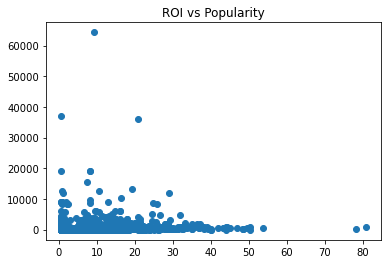

In [83]:
fig, ax = plt.subplots()
ax.scatter(big_data_df['popularity'],big_data_df['Return_on_investment'])
plt.title('ROI vs Popularity')

We dont have enough statiscally significant data points to make a conclusive statement. if we focus on the data that is congregating on the left hand side of the graph, there seems to be no correlation between ROI and popularity.

Text(0.5, 1.0, 'Popularity Distribution')

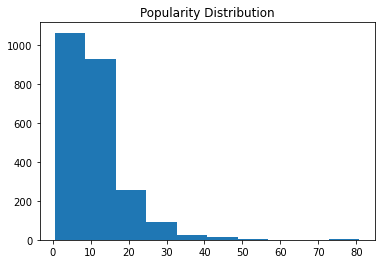

In [86]:
fig, ax = plt.subplots()
ax.hist(big_data_df['popularity'])
plt.title('Popularity Distribution')

Text(0.5, 1.0, 'ROI Distribution')

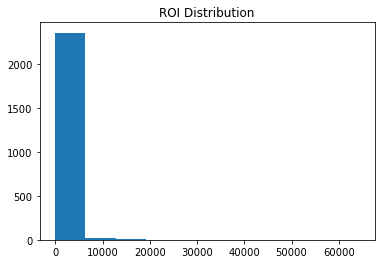

In [85]:
fig, ax = plt.subplots()
ax.hist(big_data_df['Return_on_investment'])
plt.title('ROI Distribution')

In [88]:
corr = big_data_df.corr()

<AxesSubplot:>

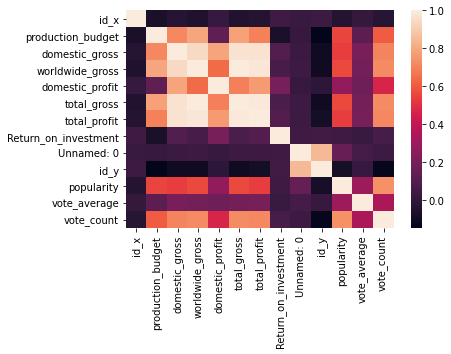

In [89]:
sns.heatmap(corr)

Text(0.5, 1.0, 'popularity vs budget')

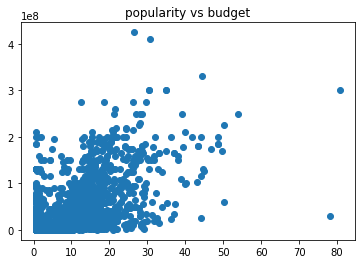

In [90]:
fig, ax = plt.subplots()
ax.scatter(big_data_df['popularity'],big_data_df['production_budget'])
plt.title('popularity vs budget')

way more correlation happening here

Text(0.5, 1.0, 'popularity vs profit')

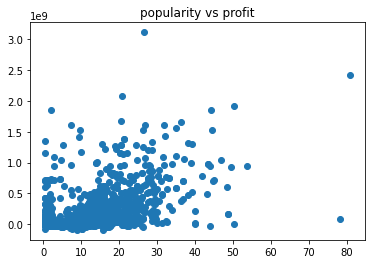

In [91]:
fig, ax = plt.subplots()
ax.scatter(big_data_df['popularity'],big_data_df['total_profit'])
plt.title('popularity vs profit')

even more correlated